<a href="https://www.kaggle.com/code/grandhisreeja/prediction-interval-house-price?scriptVersionId=244815282" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/houseprice/sample_submission.csv
/kaggle/input/houseprice/test.csv
/kaggle/input/houseprice/dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('/kaggle/input/houseprice/dataset.csv')
test=pd.read_csv('/kaggle/input/houseprice/test.csv')

In [4]:
train.columns

Index(['id', 'sale_date', 'sale_price', 'sale_nbr', 'sale_warning',
       'join_status', 'join_year', 'latitude', 'longitude', 'area', 'city',
       'zoning', 'subdivision', 'present_use', 'land_val', 'imp_val',
       'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt',
       'grade', 'fbsmt_grade', 'condition', 'stories', 'beds', 'bath_full',
       'bath_3qtr', 'bath_half', 'garb_sqft', 'gara_sqft', 'wfnt', 'golf',
       'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics',
       'view_cascades', 'view_territorial', 'view_skyline', 'view_sound',
       'view_lakewash', 'view_lakesamm', 'view_otherwater', 'view_other',
       'submarket'],
      dtype='object')

In [5]:
test.columns

Index(['id', 'sale_date', 'sale_nbr', 'sale_warning', 'join_status',
       'join_year', 'latitude', 'longitude', 'area', 'city', 'zoning',
       'subdivision', 'present_use', 'land_val', 'imp_val', 'year_built',
       'year_reno', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade',
       'fbsmt_grade', 'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr',
       'bath_half', 'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt',
       'noise_traffic', 'view_rainier', 'view_olympics', 'view_cascades',
       'view_territorial', 'view_skyline', 'view_sound', 'view_lakewash',
       'view_lakesamm', 'view_otherwater', 'view_other', 'submarket'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                200000 non-null  int64  
 1   sale_date         200000 non-null  object 
 2   sale_price        200000 non-null  int64  
 3   sale_nbr          157818 non-null  float64
 4   sale_warning      200000 non-null  object 
 5   join_status       200000 non-null  object 
 6   join_year         200000 non-null  int64  
 7   latitude          200000 non-null  float64
 8   longitude         200000 non-null  float64
 9   area              200000 non-null  int64  
 10  city              200000 non-null  object 
 11  zoning            200000 non-null  object 
 12  subdivision       182450 non-null  object 
 13  present_use       200000 non-null  int64  
 14  land_val          200000 non-null  int64  
 15  imp_val           200000 non-null  int64  
 16  year_built        20

In [7]:
train.isnull().sum()

id                      0
sale_date               0
sale_price              0
sale_nbr            42182
sale_warning            0
join_status             0
join_year               0
latitude                0
longitude               0
area                    0
city                    0
zoning                  0
subdivision         17550
present_use             0
land_val                0
imp_val                 0
year_built              0
year_reno               0
sqft_lot                0
sqft                    0
sqft_1                  0
sqft_fbsmt              0
grade                   0
fbsmt_grade             0
condition               0
stories                 0
beds                    0
bath_full               0
bath_3qtr               0
bath_half               0
garb_sqft               0
gara_sqft               0
wfnt                    0
golf                    0
greenbelt               0
noise_traffic           0
view_rainier            0
view_olympics           0
view_cascade

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Sale Prices')

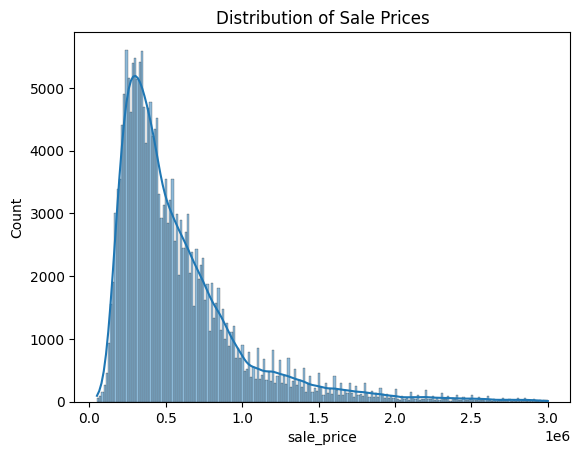

In [8]:
sns.histplot(train['sale_price'],kde=True)
plt.title('Distribution of Sale Prices')

Numerical Features

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


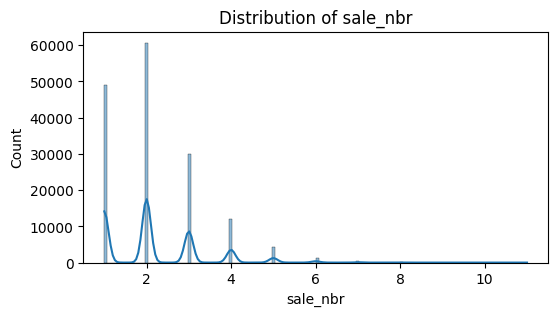

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


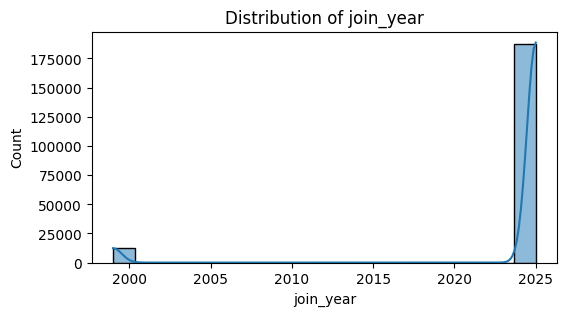

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


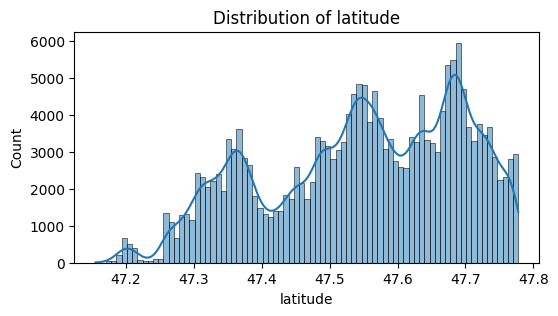

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


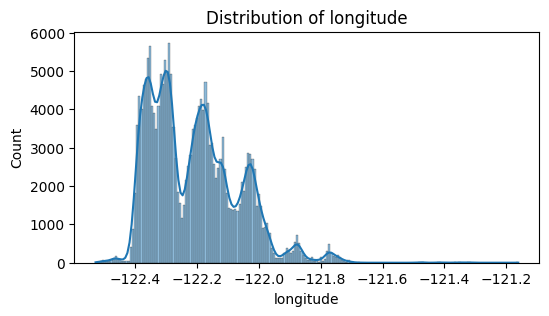

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


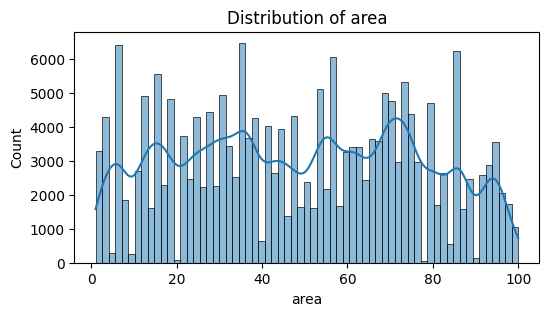

In [9]:
num_cols = train.select_dtypes(include=['int64', 'float64']).columns.drop(['id', 'sale_price'])
for col in num_cols[:5]:
    plt.figure(figsize=(6,3))
    sns.histplot(train[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

Categorical Features

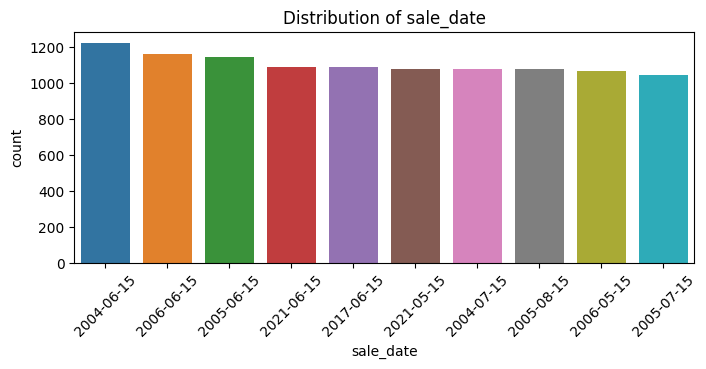

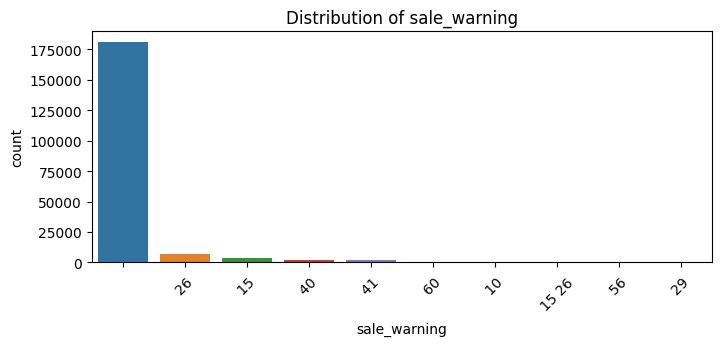

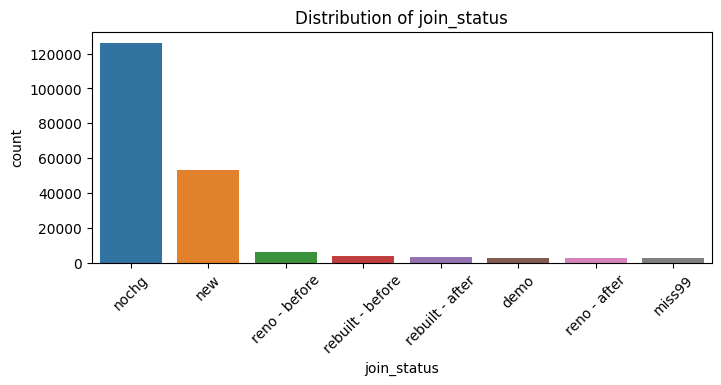

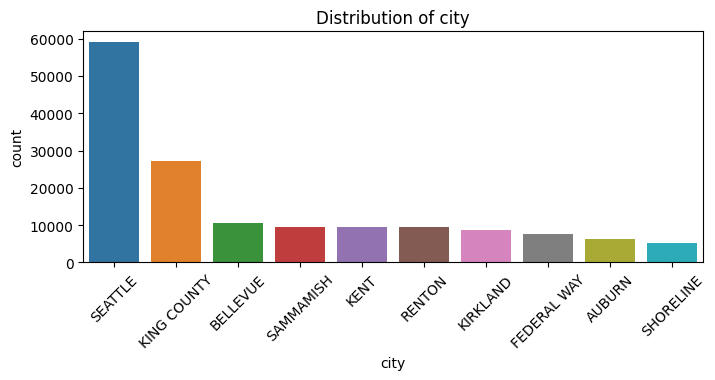

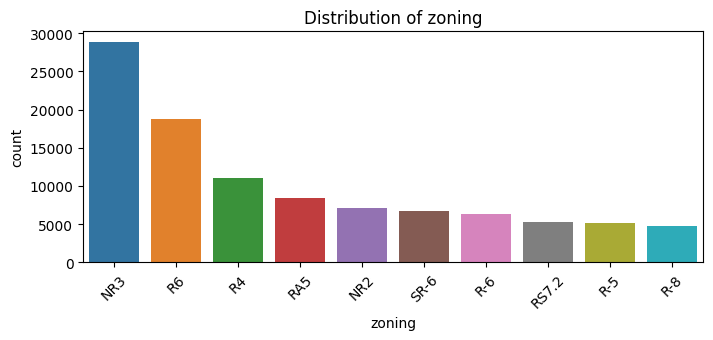

In [10]:
cat_cols = train.select_dtypes(include='object').columns
for col in cat_cols[:5]:
    plt.figure(figsize=(8,3))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index[:10])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

Correlation

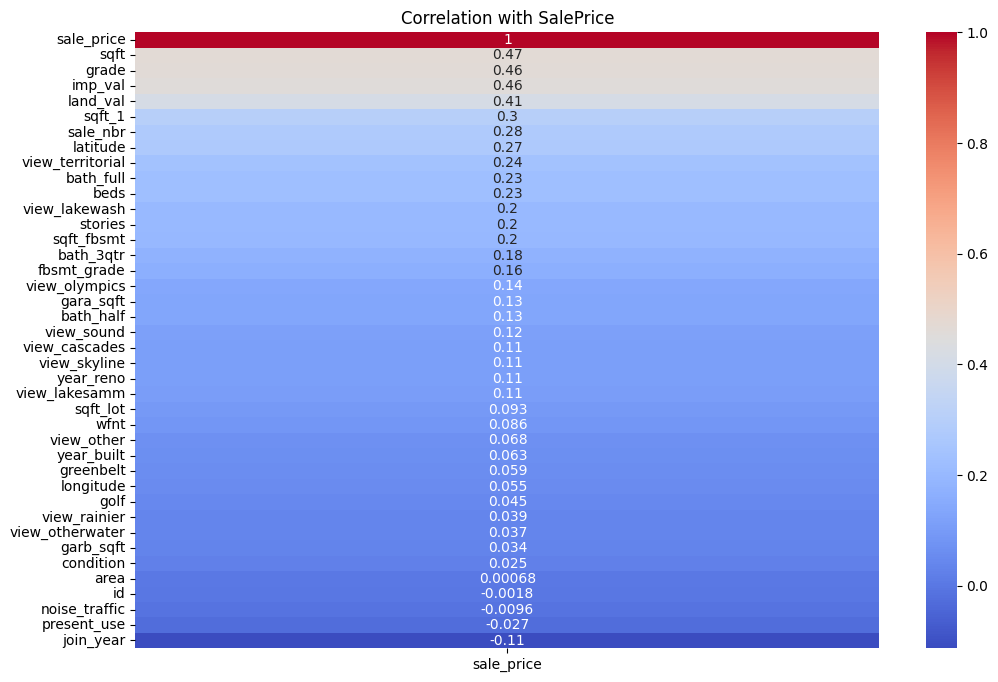

In [11]:
plt.figure(figsize=(12, 8))
corr = train.corr(numeric_only=True)
sns.heatmap(corr[['sale_price']].sort_values(by='sale_price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with SalePrice')
plt.show()


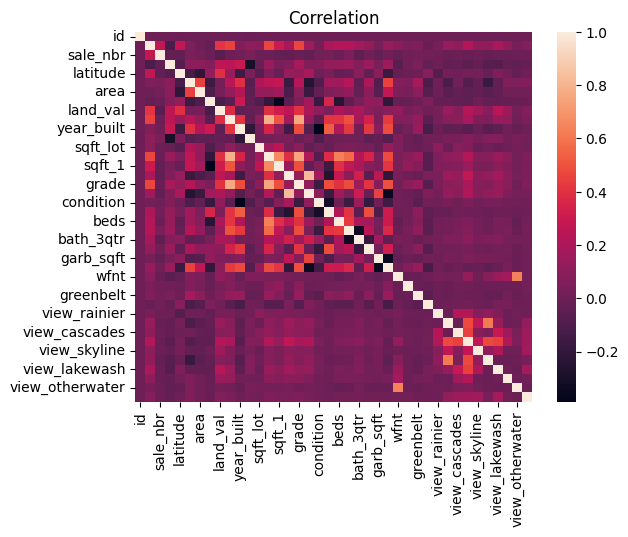

In [12]:
sns.heatmap(train.corr(numeric_only=True))
plt.title('Correlation')
plt.show()

In [13]:
categorical_cols = ['sale_date', 'sale_warning', 'join_status', 'city', 'zoning', 'subdivision', 'submarket']

In [14]:
for col in ['sale_nbr', 'subdivision', 'submarket']:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(test[col].mode()[0], inplace=True)

/tmp/ipykernel_13/2851119530.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0], inplace=True)
/tmp/ipykernel_13/2851119530.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [15]:
train.isnull().sum()

id                  0
sale_date           0
sale_price          0
sale_nbr            0
sale_warning        0
join_status         0
join_year           0
latitude            0
longitude           0
area                0
city                0
zoning              0
subdivision         0
present_use         0
land_val            0
imp_val             0
year_built          0
year_reno           0
sqft_lot            0
sqft                0
sqft_1              0
sqft_fbsmt          0
grade               0
fbsmt_grade         0
condition           0
stories             0
beds                0
bath_full           0
bath_3qtr           0
bath_half           0
garb_sqft           0
gara_sqft           0
wfnt                0
golf                0
greenbelt           0
noise_traffic       0
view_rainier        0
view_olympics       0
view_cascades       0
view_territorial    0
view_skyline        0
view_sound          0
view_lakewash       0
view_lakesamm       0
view_otherwater     0
view_other

Modeling

In [16]:
from sklearn.model_selection import train_test_split

x = train.drop(columns="sale_price")
y = train["sale_price"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [17]:
from catboost import CatBoostRegressor, Pool
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=100
)
train_pool = Pool(x_train, y_train, cat_features=categorical_cols)
test_pool = Pool(x_test, y_test, cat_features=categorical_cols)
model.fit(train_pool)

y_pred = model.predict(test_pool)

0:	learn: 390920.4277882	total: 263ms	remaining: 4m 22s
100:	learn: 128348.4766294	total: 12.5s	remaining: 1m 50s
200:	learn: 119708.8194017	total: 25.5s	remaining: 1m 41s
300:	learn: 115057.0508658	total: 38.3s	remaining: 1m 28s
400:	learn: 111960.9763283	total: 51.5s	remaining: 1m 16s
500:	learn: 109619.0427081	total: 1m 3s	remaining: 1m 3s
600:	learn: 107279.8736634	total: 1m 16s	remaining: 50.8s
700:	learn: 105378.4559083	total: 1m 29s	remaining: 38.2s
800:	learn: 103744.7677952	total: 1m 42s	remaining: 25.4s
900:	learn: 102162.0579560	total: 1m 54s	remaining: 12.6s
999:	learn: 100762.6283612	total: 2m 7s	remaining: 0us


In [18]:
from catboost import CatBoostRegressor, Pool
model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=10
)
train_pool = Pool(x_train, y_train, cat_features=categorical_cols)
test_pool = Pool(x_test, y_test, cat_features=categorical_cols)
model.fit(train_pool)

y_pred = model.predict(test_pool)

0:	learn: 391127.0869833	total: 61.7ms	remaining: 6.11s
10:	learn: 240821.4839321	total: 593ms	remaining: 4.79s
20:	learn: 187583.7670388	total: 1.05s	remaining: 3.97s
30:	learn: 165341.0968197	total: 1.5s	remaining: 3.35s
40:	learn: 153379.9930702	total: 1.95s	remaining: 2.81s
50:	learn: 146294.5451540	total: 2.38s	remaining: 2.28s
60:	learn: 141034.9097965	total: 2.83s	remaining: 1.81s
70:	learn: 136698.1767926	total: 3.27s	remaining: 1.33s
80:	learn: 133809.1412907	total: 3.73s	remaining: 875ms
90:	learn: 131609.7653219	total: 4.18s	remaining: 414ms
99:	learn: 129978.9807343	total: 4.59s	remaining: 0us


In [19]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


RMSE: 123722.91351172386
R2 Score: 0.9114051839881093


In [20]:
alpha = 0.05  
lower_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Quantile:alpha=0.025',
    random_seed=42,
    verbose=100
)
upper_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Quantile:alpha=0.975',
    random_seed=42,
    verbose=100
)

In [21]:
lower_model.fit(train_pool)
upper_model.fit(train_pool)


0:	learn: 10937.9013647	total: 138ms	remaining: 2m 17s
100:	learn: 5680.2495112	total: 14.7s	remaining: 2m 10s
200:	learn: 5303.7903330	total: 28s	remaining: 1m 51s
300:	learn: 5172.4772409	total: 40.6s	remaining: 1m 34s
400:	learn: 5106.0669244	total: 54.1s	remaining: 1m 20s
500:	learn: 5046.0551759	total: 1m 6s	remaining: 1m 6s
600:	learn: 5015.7470964	total: 1m 19s	remaining: 52.8s
700:	learn: 4999.8020241	total: 1m 31s	remaining: 39.2s
800:	learn: 4983.3491952	total: 1m 43s	remaining: 25.8s
900:	learn: 4973.4205452	total: 1m 56s	remaining: 12.8s
999:	learn: 4960.3480274	total: 2m 9s	remaining: 0us
0:	learn: 37367.4050289	total: 154ms	remaining: 2m 33s
100:	learn: 7490.0318378	total: 14.2s	remaining: 2m 6s
200:	learn: 6807.2015897	total: 27.7s	remaining: 1m 50s
300:	learn: 6620.4326983	total: 40.4s	remaining: 1m 33s
400:	learn: 6500.8510097	total: 54s	remaining: 1m 20s
500:	learn: 6449.0053439	total: 1m 6s	remaining: 1m 6s
600:	learn: 6400.8119485	total: 1m 20s	remaining: 53.1s
700:

In [22]:
lower_bound = lower_model.predict(test_pool)
upper_bound = upper_model.predict(test_pool)


In [23]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Lower_Bound': lower_bound,
    'Upper_Bound': upper_bound
}).reset_index(drop=True)
print("Sample Predictions with 95% Prediction Intervals:")
print(results.head(10))

Sample Predictions with 95% Prediction Intervals:
    Actual     Predicted    Lower_Bound   Upper_Bound
0   540000  5.850726e+05  454003.125821  7.260213e+05
1   715000  7.697170e+05  542391.337600  1.278720e+06
2   627000  6.274606e+05  521443.010399  8.209299e+05
3   265400  2.634331e+05  212233.207055  4.005806e+05
4   460000  4.386780e+05  323532.572383  5.192018e+05
5  1050000  1.147554e+06  466796.648053  1.960345e+06
6   171500  1.478706e+05  127024.336913  1.777813e+05
7   345600  3.888819e+05  245896.610916  5.088852e+05
8   322000  3.007293e+05  193976.147064  3.513397e+05
9   532500  3.968170e+05  322370.205482  5.015962e+05


In [24]:
test = pd.read_csv('/kaggle/input/houseprice/test.csv') 


for col in categorical_cols:
    test[col] = test[col].astype(str) 

test_pool = Pool(test, cat_features=categorical_cols)

lower_bound = lower_model.predict(test_pool)
upper_bound = upper_model.predict(test_pool)


submission = pd.DataFrame({
    'id': test['id'],  
    'pi_lower': lower_bound,
    'pi_upper': upper_bound
})

submission.to_csv('submission.csv', index=False, encoding='utf-8-sig')
